Q3. Steepest Gradient Descent (own implementation) with x0=(1.2,1.2)



minima at =  tf.Tensor(
[[1.1022561]
 [1.214232 ]], shape=(2, 1), dtype=float32)
function value at minima =  tf.Tensor([0.01051054], shape=(1,), dtype=float32)
number of iteration = 48


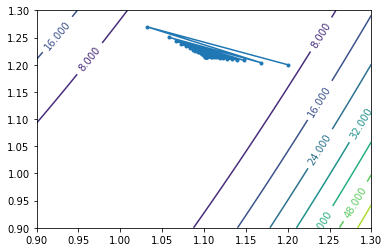

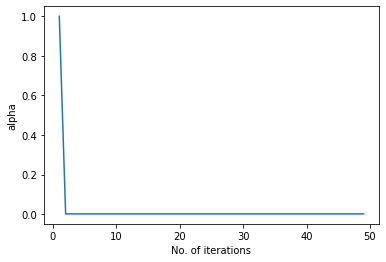

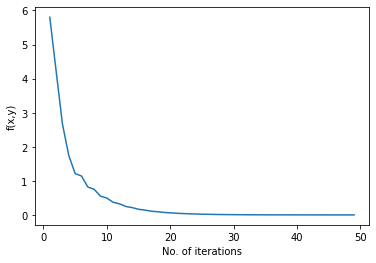

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x0=tf.Variable([[1.2],[1.2]])
x=tf.Variable(x0)
xdata=x0
alpha_data=tf.Variable([1.0])

def f(x):
    return tf.square(1-x[0])+100*tf.square(x[1]-tf.square(x[0]))
rho=0.9
c=10**(-4)
itr=0
zdata=f(x0)

while(itr>=0):
    alpha=1.0
    x0=tf.Variable(x)
    with tf.GradientTape() as t:
        fx = tf.square(1-x0[0])+100*tf.square(x0[1]-tf.square(x0[0]))
    df = t.gradient(fx,x0)

    while(f(x0-tf.multiply(alpha,df))>=f(x0)-tf.multiply(c*alpha,tf.matmul(tf.transpose(df),df))):
        alpha=rho*alpha
        
    
    alpha_data=tf.concat([alpha_data,[alpha]],0)
    

    x=x0-tf.multiply(alpha,df)
    itr+=1
    xdata=tf.concat([xdata,x],1)
    zdata=tf.concat([zdata,f(x)],0)
    if(tf.norm(x-x0,ord='euclidean')<10**(-3)):
      break

print("minima at = ",x)
print("function value at minima = ",f(x))
print("number of iteration =",itr)

X,Y=np.meshgrid(np.linspace(0.9,1.3,100),np.linspace(0.9,1.3,100))
Z=np.square(1-X)+100*np.square(Y-np.square(X))
cp=plt.contour(X,Y,Z)
plt.clabel(cp, inline=1, fontsize=10)

plt.plot(xdata[0,:],xdata[1,:],marker='.')
plt.show()

plt.plot(np.linspace(1,itr+1,itr+1),alpha_data)
plt.xlabel('No. of iterations')
plt.ylabel('alpha')
plt.show()

plt.plot(np.linspace(1,itr+1,itr+1),zdata)
plt.xlabel('No. of iterations')
plt.ylabel('f(x,y)')
plt.show()

Q2. Steepest Gradient Descent (own implementation) with x0=(-1.2,1)

minima at =  tf.Tensor(
[[1.4185683]
 [2.018157 ]], shape=(2, 1), dtype=float32)
function value at minima =  tf.Tensor([0.17858806], shape=(1,), dtype=float32)
number of iteration = 49


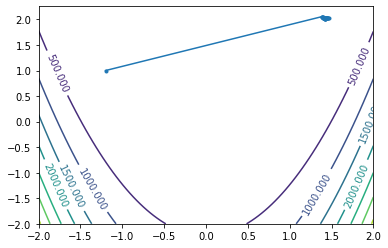

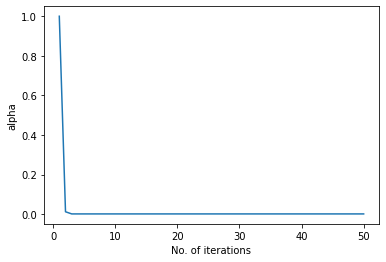

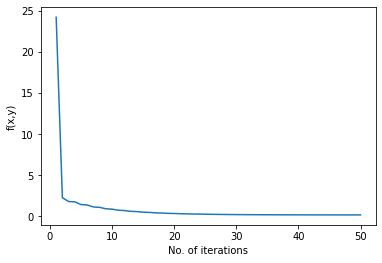

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x0=tf.Variable([[-1.2],[1.0]])
x=tf.Variable(x0)
xdata=x0
alpha_data=tf.Variable([1.0])
def f(x):
    return tf.square(1-x[0])+100*tf.square(x[1]-tf.square(x[0]))
rho=0.9
c=10**(-4)
itr=0
zdata=f(x0)

while(itr>=0):
    alpha=1.0
    x0=tf.Variable(x)
    with tf.GradientTape() as t:
        fx = tf.square(1-x0[0])+100*tf.square(x0[1]-tf.square(x0[0]))
    df = t.gradient(fx,x0)

    while(f(x0-tf.multiply(alpha,df))>=f(x0)-tf.multiply(c*alpha,tf.matmul(tf.transpose(df),df))):
        alpha=rho*alpha
        
    alpha_data=tf.concat([alpha_data,[alpha]],0)
    x=x0-tf.multiply(alpha,df)
    itr+=1
    xdata=tf.concat([xdata,x],1)
    zdata=tf.concat([zdata,f(x)],0)
    if(tf.norm(x-x0,ord='euclidean')<10**(-2.5)):
      break

print("minima at = ",x)
print("function value at minima = ",f(x))
print("number of iteration =",itr)

X,Y=np.meshgrid(np.linspace(-2.0,2.0,100),np.linspace(-2.0,2.0,100))
Z=np.square(1-X)+100*np.square(Y-np.square(X))
cp=plt.contour(X,Y,Z)
plt.clabel(cp, inline=1, fontsize=10)

plt.plot(xdata[0,:],xdata[1,:],marker='.')
plt.show()

plt.plot(np.linspace(1,itr+1,itr+1),alpha_data)
plt.xlabel('No. of iterations')
plt.ylabel('alpha')
plt.show()

plt.plot(np.linspace(1,itr+1,itr+1),zdata)
plt.xlabel('No. of iterations')
plt.ylabel('f(x,y)')
plt.show()

Q3. Steepest Gradient Descent (built in function) with x0=(1.2,1.2)

minima at =  1.0259594 1.0526948
function value at minima =  0.00067493273
number of iteration = 4000


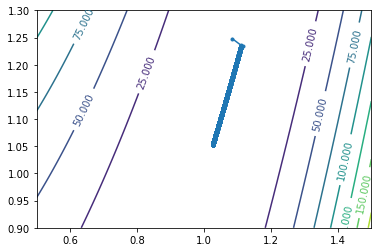

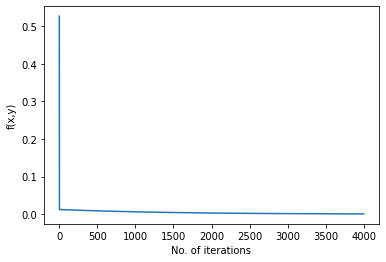

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x=tf.Variable(1.2)
y=tf.Variable(1.2)
n=4000
def f():
  return (1-x)**2+100*(y-x**2)**2
sgd=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.0)
itr=np.zeros(n, dtype=float)
x_data=np.zeros(n, dtype=float)
y_data=np.zeros(n, dtype=float)
f_data=np.zeros(n, dtype=float)
for i in range(n):
  sgd.minimize(f,var_list=[x,y],tape=None)
  itr[i]=i
  x_data[i]=x
  y_data[i]=y
  f_data[i]=f()

print("minima at = ",x.numpy(),y.numpy())
print("function value at minima = ",f().numpy())
print("number of iteration =",n)

X,Y=np.meshgrid(np.linspace(0.5,1.5,100),np.linspace(0.9,1.3,100))
Z=np.square(1-X)+100*np.square(Y-np.square(X))
cp=plt.contour(X,Y,Z)
plt.clabel(cp, inline=1, fontsize=10)

plt.plot(x_data,y_data,marker='.')
plt.show()

plt.plot(itr,f_data)
plt.xlabel('No. of iterations')
plt.ylabel('f(x,y)')
plt.show()

Q3. Steepest Gradient Descent (built in function) with x0=(-1.2,1.0)

minima at =  0.9827447 0.9657173
function value at minima =  0.00029823277
number of iteration = 8000


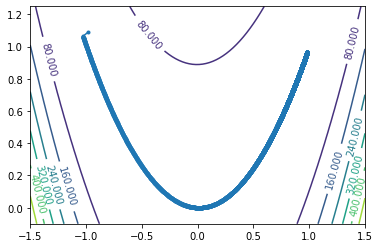

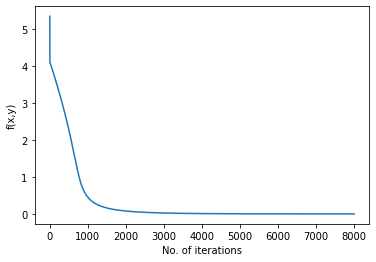

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x=tf.Variable(-1.2)
y=tf.Variable(1.0)
n=8000
def f():
  return (1-x)**2+100*(y-x**2)**2
sgd=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.0)
itr=np.zeros(n, dtype=float)
x_data=np.zeros(n, dtype=float)
y_data=np.zeros(n, dtype=float)
f_data=np.zeros(n, dtype=float)
for i in range(n):
  sgd.minimize(f,var_list=[x,y],tape=None)
  itr[i]=i
  x_data[i]=x
  y_data[i]=y
  f_data[i]=f()

print("minima at = ",x.numpy(),y.numpy())
print("function value at minima = ",f().numpy())
print("number of iteration =",n)

X,Y=np.meshgrid(np.linspace(-1.5,1.5,100),np.linspace(-0.1,1.25,100))
Z=np.square(1-X)+100*np.square(Y-np.square(X))
cp=plt.contour(X,Y,Z)
plt.clabel(cp, inline=1, fontsize=10)

plt.plot(x_data,y_data,marker='.')
plt.show()

plt.plot(itr,f_data)
plt.xlabel('No. of iterations')
plt.ylabel('f(x,y)')
plt.show()

Q3. Newton's Method (own implementation) with x0=(1.2,1.2)

minima at =  tf.Tensor(
[[1.1874272]
 [1.35406  ]], shape=(2, 1), dtype=float32)
function value at minima =  tf.Tensor([0.34786963], shape=(1,), dtype=float32)
number of iteration = 1000


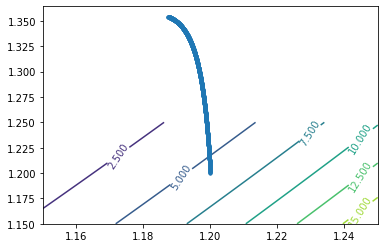

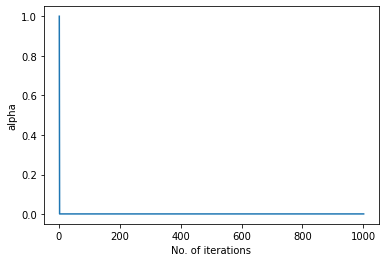

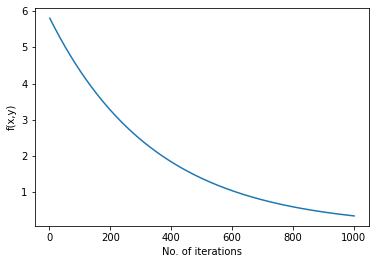

In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x0=tf.Variable([[1.2],[1.2]])
x=tf.Variable(x0)
xdata=x0
alpha_data=tf.Variable([1.0])
def f(x):
    return tf.square(1-x[0])+100*tf.square(x[1]-tf.square(x[0]))

rho=0.9
c=10**(-4)
itr=0
zdata=f(x0)

while(itr<1000):
    alpha=1.0
    x0=tf.Variable(x)
    
    with tf.GradientTape() as t2:
      with tf.GradientTape() as t1: 
        y =tf.square(1-x0[0])+100*tf.square(x0[1]-tf.square(x0[0]))
      df = t1.gradient(y, x0) 
    d2f = t2.jacobian(df, x0)

    d2f=tf.reshape(d2f,[2,2])
    while(f(x0-tf.multiply(alpha,df))>=f(x0)-tf.multiply(c*alpha,tf.matmul(tf.transpose(df),df))):
        alpha=rho*alpha
        
    alpha_data=tf.concat([alpha_data,[alpha]],0)
    
    x=x0-tf.multiply(alpha,tf.matmul(tf.linalg.inv(d2f),df))
    itr+=1
    xdata=tf.concat([xdata,x],1)
    zdata=tf.concat([zdata,f(x)],0)
    if(tf.norm(x-x0,ord='euclidean')<10**(-5)):
      break

print("minima at = ",x)
print("function value at minima = ",f(x))
print("number of iteration =",itr)

X,Y=np.meshgrid(np.linspace(1.15,1.25,100),np.linspace(1.15,1.25,100))
Z=np.square(1-X)+100*np.square(Y-np.square(X))
cp=plt.contour(X,Y,Z)
plt.clabel(cp, inline=1, fontsize=10)

plt.plot(xdata[0,:],xdata[1,:],marker='.')
plt.show()

plt.plot(np.linspace(1,itr+1,itr+1),alpha_data)
plt.xlabel('No. of iterations')
plt.ylabel('alpha')
plt.show()

plt.plot(np.linspace(1,itr+1,itr+1),zdata)
plt.xlabel('No. of iterations')
plt.ylabel('f(x,y)')
plt.show()

Q3. Newton's Method (own implementation) with x0=(-1.2,1.0)

minima at =  tf.Tensor(
[[0.97063124]
 [0.94194376]], shape=(2, 1), dtype=float32)
function value at minima =  tf.Tensor([0.00086581], shape=(1,), dtype=float32)
number of iteration = 1000


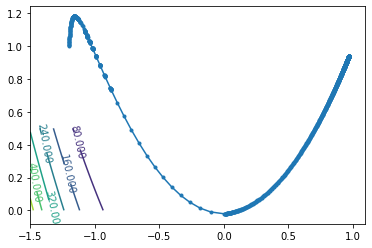

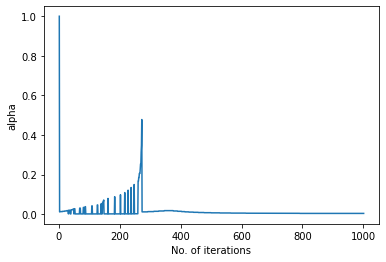

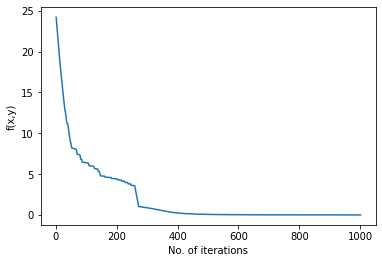

In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x0=tf.Variable([[-1.2],[1.0]])
x=tf.Variable(x0)
xdata=x0
alpha_data=tf.Variable([1.0])
def f(x):
    return tf.square(1-x[0])+100*tf.square(x[1]-tf.square(x[0]))

rho=0.9
c=10**(-4)
itr=0
zdata=f(x0)

while(itr<1000):
    alpha=1.0
    x0=tf.Variable(x)
    
    with tf.GradientTape() as t2:
      with tf.GradientTape() as t1: 
        y =tf.square(1-x0[0])+100*tf.square(x0[1]-tf.square(x0[0]))
      df = t1.gradient(y, x0) 
    d2f = t2.jacobian(df, x0)

    d2f=tf.reshape(d2f,[2,2])
    while(f(x0-tf.multiply(alpha,df))>=f(x0)-tf.multiply(c*alpha,tf.matmul(tf.transpose(df),df))):
        alpha=rho*alpha

    alpha_data=tf.concat([alpha_data,[alpha]],0)
    x=x0-tf.multiply(alpha,tf.matmul(tf.linalg.inv(d2f),df))
    itr+=1
    xdata=tf.concat([xdata,x],1)
    zdata=tf.concat([zdata,f(x)],0)
    if(tf.norm(x-x0,ord='euclidean')<10**(-5)):
      break

print("minima at = ",x)
print("function value at minima = ",f(x))
print("number of iteration =",itr)

X,Y=np.meshgrid(np.linspace(-1.5,0,100),np.linspace(0.5,0,100))
Z=np.square(1-X)+100*np.square(Y-np.square(X))
cp=plt.contour(X,Y,Z)
plt.clabel(cp, inline=1, fontsize=10)

plt.plot(xdata[0,:],xdata[1,:],marker='.')
plt.show()

plt.plot(np.linspace(1,itr+1,itr+1),alpha_data)
plt.xlabel('No. of iterations')
plt.ylabel('alpha')
plt.show()

plt.plot(np.linspace(1,itr+1,itr+1),zdata)
plt.xlabel('No. of iterations')
plt.ylabel('f(x,y)')
plt.show()

Q3. Newton's Method (built in) with x0=(1.2,1.2)

minima at =  [1.00000002 1.00000002]
function value at minima =  3.5667813960184306e-14


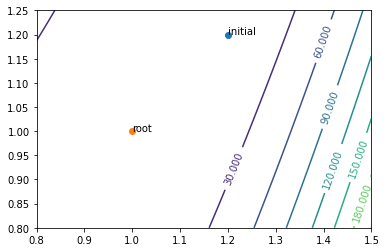

In [16]:
import numpy as np
import tensorflow as tf
from scipy import optimize
import matplotlib.pyplot as plt

x=tf.Variable([1.2,1.2])
def f(x):
  return (1-x[0])**2+100*(x[1]-x[0]**2)**2

root=optimize.newton(f,x)

print("minima at = ",root)
print("function value at minima = ",f(root))

X,Y=np.meshgrid(np.linspace(0.8,1.5,100),np.linspace(0.8,1.25,100))
Z=np.square(1-X)+100*np.square(Y-np.square(X))
cp=plt.contour(X,Y,Z)
plt.clabel(cp, inline=1, fontsize=10)

plt.plot(x[0],x[1],marker='o')
plt.text(x[0],x[1],'initial')
plt.plot(root[0],root[1],marker='o')
plt.text(root[0],root[1],'root')
plt.show()


Q3. Newton's Method (built in) with x0=(-1.2,1.0)

In [17]:
import numpy as np
import tensorflow as tf
from scipy import optimize
import matplotlib.pyplot as plt

x=tf.Variable([-1.2,1.0])
def f(x):
  return (1-x[0])**2+100*(x[1]-x[0]**2)**2

root=optimize.newton(f,x)
print("minima at = ",root)
print("function value at minima = ",f(root))

X,Y=np.meshgrid(np.linspace(0.8,1.5,100),np.linspace(0.8,1.25,100))
Z=np.square(1-X)+100*np.square(Y-np.square(X))
cp=plt.contour(X,Y,Z)
plt.clabel(cp, inline=1, fontsize=10)

plt.plot(x[0],x[1],marker='o')
plt.text(x[0],x[1],'initial')
plt.plot(root[0],root[1],marker='o')
plt.text(root[0],root[1],'root')
plt.show()



RuntimeError: ignored